# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease **classification**.,

More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 
 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
 
The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.


The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

### Preparing tools

In [1]:
# importting all tools
# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# lets find no. of classes in the dataset
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

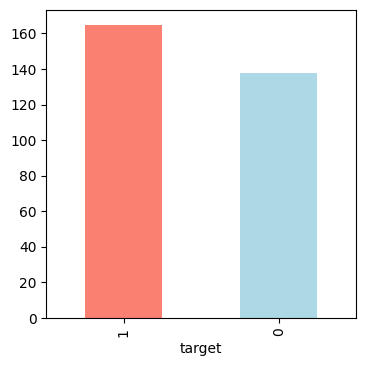

In [5]:
df.target.value_counts().plot.bar(figsize=(4,4),color=["salmon","lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploring Features and co-relation btw them

## Heart-disease frequency wrt sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

* 0 - Female
* 1 - Male

In [10]:
# Compare target with sex colnm
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


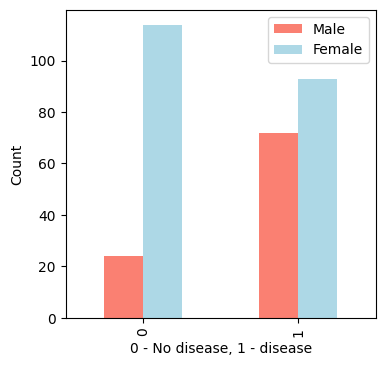

In [11]:
# Compare target with sex colnm
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(4,4),  color=["salmon","lightblue"]);
plt.xlabel("0 - No disease, 1 - disease")
plt.ylabel("Count")
plt.legend(["Male","Female"])

## Age vs Max heart-rate for Disease

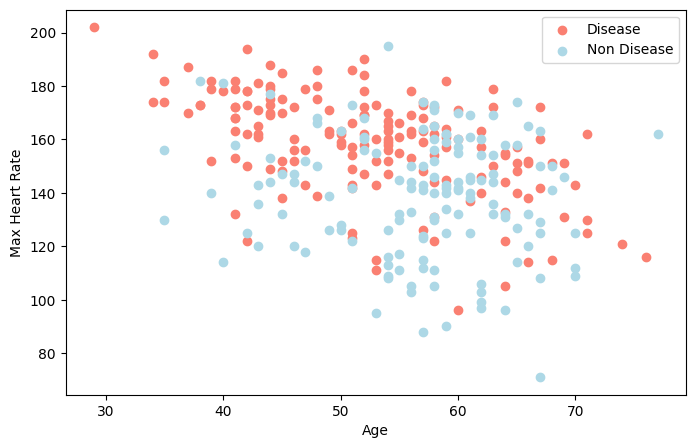

In [12]:
plt.figure(figsize=(8,5))
# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
            c="salmon")

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
            c="lightblue");

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "Non Disease"])

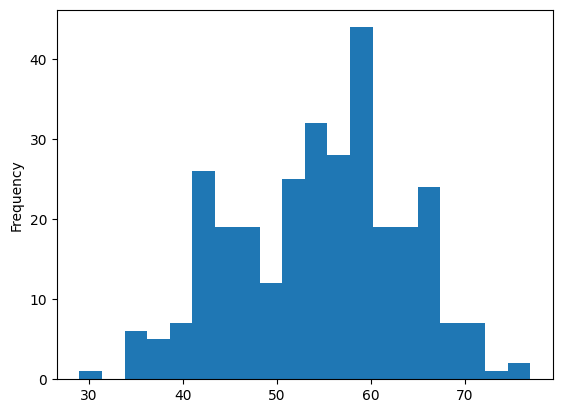

In [13]:
# Distribution of Age 
df.age.plot.hist(bins=20);

## Making a Correlation Matrix

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


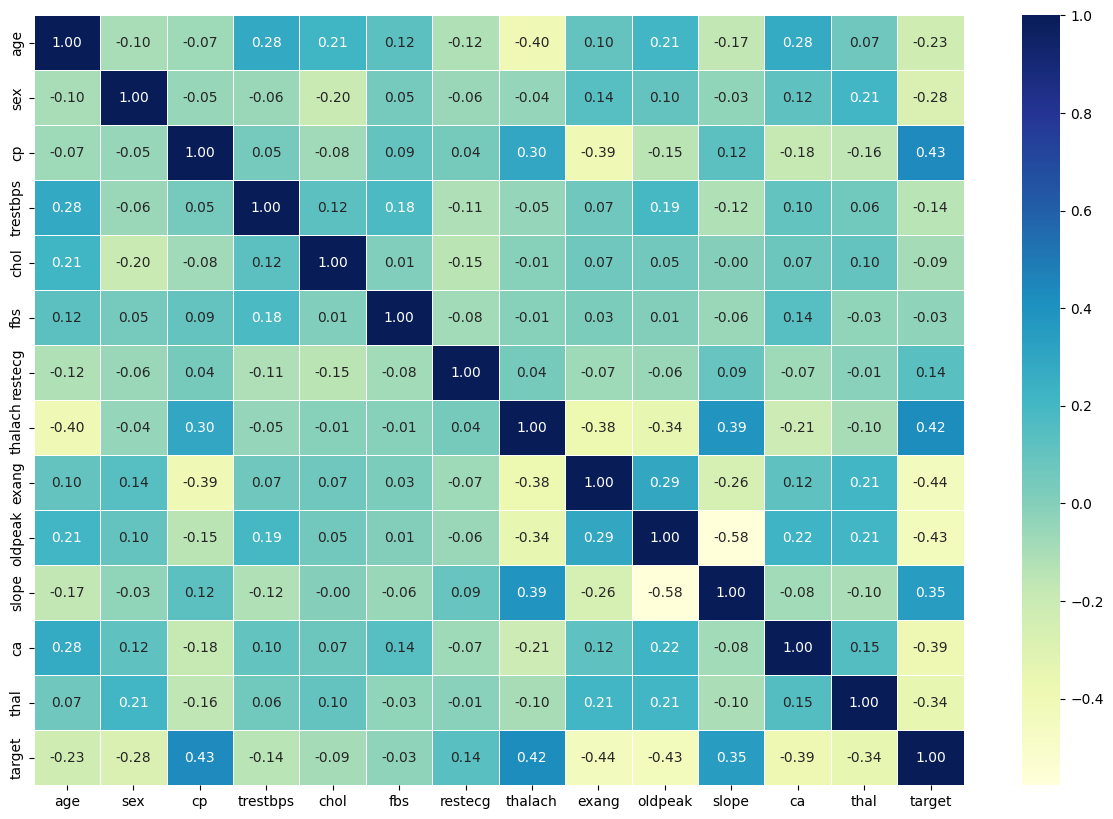

In [15]:
# Lets make it little visual
corr_mat = df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## Modeling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Spliting data into X, y AND sets
X = df.drop("target", axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test.head()

63     1
295    0
235    0
116    1
111    1
Name: target, dtype: int64

# Training

In [18]:
# Put models into dict
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier() ,
         }

# Create func to fit and base score
def fit_n_score(models, X_train, X_test, y_train, y_test ):
    np.random.seed(42)
    model_score = {}
    for m_name , m_obj  in models.items():
        m_obj.fit(X_train, y_train)
        model_score[m_name] = m_obj.score(X_test,y_test)
    return model_score


In [19]:
model_scores = fit_n_score(models, X_train, X_test, y_train, y_test)
model_scores

s:\CODE\Program\AI\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

In [20]:
mod_compare = pd.DataFrame(model_scores, index = ["accuracy"])
mod_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.819672,0.704918,0.836066


<Axes: >

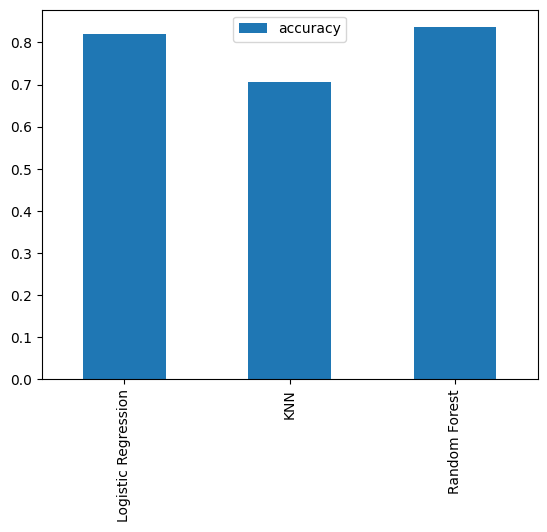

In [21]:
mod_compare.T.plot.bar()

## Lets look at the following 
* Hyperparameter tuning
* Featur importance
* confusion matrix
* cross-validation
* precision, recall
* f1-score
* overall classification report
* ROC curve or AUC

In [22]:
# lets tune KNN
train_score = []
test_score = []
neighbors = range(1,21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))



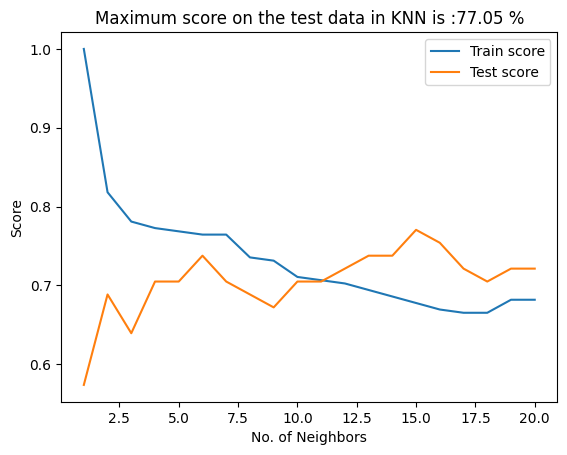

In [23]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xlabel("No. of Neighbors")
plt.ylabel("Score")
plt.legend()
plt.title(f"Maximum score on the test data in KNN is :{max(test_score)*100:.2f} %");

## Hyperparameter tuning of logistic regression and random forest models using RandomSearchCV

In [24]:
# grid for logistic
log_grid = { "C":np.logspace(-4, 4, 20),
           "solver":["liblinear"]}
rf_grid = {"n_estimators":np.arange(10, 150, 10)}


In [25]:
np.random.seed(42)
rs_log = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [27]:
rs_log.score(X_test, y_test)

0.8032786885245902

## now tune another random forest model

In [28]:
np.random.seed(42)
rs_rfst = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rfst.fit(X_train, y_train)

s:\CODE\Program\AI\.venv\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 14 candidates, totalling 70 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
                   verbose=True)

In [29]:
rs_rfst.score(X_test, y_test)

0.819672131147541

In [30]:
rs_rfst.best_params_

{'n_estimators': 140}

### lets retune it with GridSearchCV

In [31]:
np.random.seed(42)

rf_grid = {"n_estimators": np.arange(70,78,2) ,
           "max_features" : ["sqrt", "log2", None],
           "criterion" : ["gini", "entropy", "log_loss"]
          }

gs_rfst = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=5, 
                           verbose=True)
gs_rfst.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([70, 72, 74, 76])},
             verbose=True)

In [32]:
gs_rfst.best_params_ 

{'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 76}

In [33]:
print("Grid cv: ",gs_rfst.score(X_test, y_test))
print("Rondomised cv: ",rs_rfst.score(X_test, y_test))

Grid cv:  0.819672131147541
Rondomised cv:  0.819672131147541


## Evaluting our tuned machine learning classifier
* ROC curve
* Confusion matrix
* Classifier report
* Precision
* Recall
* F1 - Score 

In [34]:
y_preds = rs_rfst.predict(X_test)
y_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [35]:
# from sklearn.model_selection import roc_curve
# def plot_roc_curve(model, X_test, y_test):
#     y_probs = model.predict_proba(X_test)
#     y_probs_positive = y_probs[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_probs_positive)

#     plt.figure(figsize=(5, 5))
#     plt.plot(fpr, tpr, color="orange", label="ROC")
#     # plt.plot([0, 1], [0, 1], color="green", label="Guessing", linestyle="--")
#     plt.xlabel("False positive rate (fpr)")
#     plt.ylabel("True positive rate (tpr)")
#     plt.title("Receiver Operating Characteristic (ROC) Curve")
#     auc_score = roc_auc_score(y_test, y_probs_positive)
#     plt.legend([f"ROC AUC : {auc_score:.2f}"], loc="lower right")  # Updated legend
#     plt.show()

# plot_roc_curve(rs_rfst, X_test, y_test)

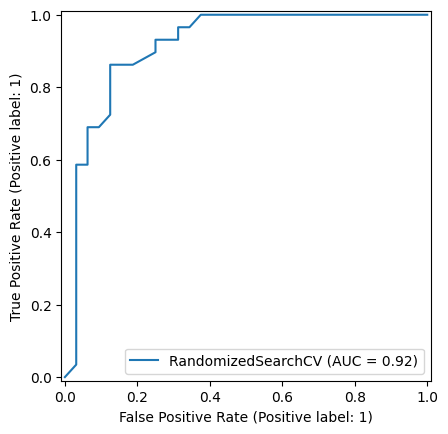

In [37]:


from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator( rs_rfst, X_test, y_test)
plt.show()

In [38]:
# Confusion Metrix
print(confusion_matrix(y_test, y_preds))

[[24  8]
 [ 3 26]]


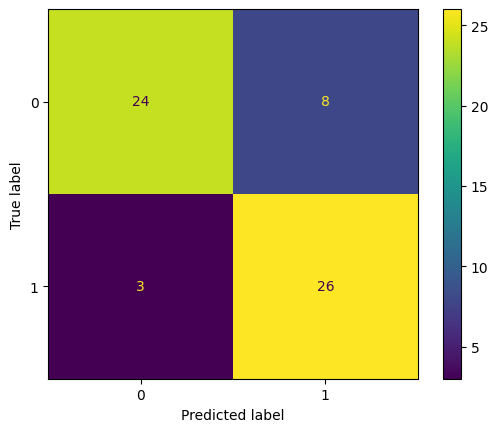

In [39]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp1 = ConfusionMatrixDisplay.from_estimator(rs_rfst, X_test, y_test)

In [40]:
# classification report
cl_rep = classification_report(y_test, y_preds)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



## Now evaluation with Cross Validation 
* (well.., it should be given X_train, y_train only, for further spliting that into training and validation dataset ( training set is split into k smaller sets), to get metrics..)
* but due to smaller dataset len, performing cv on all X, y

In [41]:
# check best params and reinitiate new model
rs_rfst.best_params_

{'n_estimators': 140}

In [42]:
rfst = RandomForestClassifier(n_estimators=70)


In [43]:
# # past implementation
# np.random.seed(1)
# def get_cross_val_scores(model, X, y, scoring, cv=5, is_mean=False):
#     cv_scores = {}
#     for name in scoring:
        # scr = cross_val_score(model, X, y, scoring=name, cv=cv)
#         cv_scores[name] = scr 

#     if is_mean:
#         mean_scores = {name: np.mean(scores) for name, scores in cv_scores.items()}
#         # Convert mean scores to DataFrame
#         df_cv_scores = pd.DataFrame(mean_scores, index=['Mean'])
#     else: 
#         df_cv_scores = pd.DataFrame(cv_scores, index=range(1, cv+1))
#     return df_cv_scores
    
# scoring = ["accuracy", "precision", "recall", "f1"]

# # cvs = get_cross_val_scores(rfst, X, y, scoring, cv=5, is_mean=True)
# cvs = get_cross_val_scores(rfst, X, y, scoring)

# cvs
    

In [44]:
# new way
# np.random.seed(1)
from sklearn.model_selection import cross_validate
scoring = ["accuracy", "precision", "recall", "f1"] 

# cvs = cross_validate(rfst, X, y, scoring=scoring)
c_val = cross_validate(rfst, X, y, scoring=scoring, return_estimator=True)
# c_val = cross_validate(rfst, X, y, scoring=scoring, return_indices=True, return_estimator=True)
# print(c_val)

# mean of all values
# cvs = {name: np.mean(scores) for name, scores in c_val.items() if name != 'estimator'}
# cvs = pd.DataFrame(cvs , index=['Mean'])   

cvs = {key: value for key, value in c_val.items() if not isinstance(value, dict)}
cvs = pd.DataFrame(cvs )   # not convertable in return_indices=True,
cvs 

,fit_time,score_time,estimator,test_accuracy,test_precision,test_recall,test_f1
0,0.194782,0.019423,"(DecisionTreeClassifier(max_features='sqrt', r...",0.836066,0.828571,0.878788,0.852941
1,0.190792,0.023627,"(DecisionTreeClassifier(max_features='sqrt', r...",0.885246,0.906250,0.878788,0.892308
2,0.192403,0.031951,"(DecisionTreeClassifier(max_features='sqrt', r...",0.786885,0.812500,0.787879,0.800000
3,0.197327,0.015632,"(DecisionTreeClassifier(max_features='sqrt', r...",0.866667,0.878788,0.878788,0.878788
4,0.219758,0.018178,"(DecisionTreeClassifier(max_features='sqrt', r...",0.816667,0.789474,0.909091,0.845070


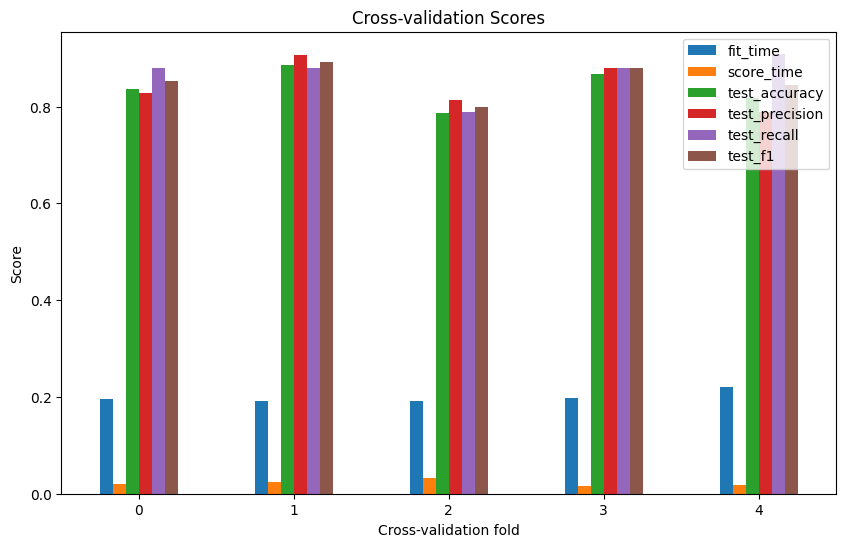

In [45]:
# Plot the DataFrame
if isinstance(cvs, dict):
    cvs = pd.DataFrame(cvs)
cvs.plot(kind='bar', figsize=(10, 6), xlabel='Cross-validation fold', ylabel='Score', title='Cross-validation Scores')
plt.xticks(rotation=0)   
plt.show()

In [46]:
c_val['estimator']

[RandomForestClassifier(n_estimators=70),
 RandomForestClassifier(n_estimators=70),
 RandomForestClassifier(n_estimators=70),
 RandomForestClassifier(n_estimators=70),
 RandomForestClassifier(n_estimators=70)]

In [47]:
rfst_hs = c_val['estimator'][1]

In [48]:
rfst_hs.score(X_test, y_test)

0.9672131147540983

## As its estimator from cv, validated on X and y, thus this much high score

# Ḷets find feature importance of RandomForestClassifier model

In [49]:
print("RondomisedCV (* fit on X_train): ",rs_rfst.score(X_test, y_test))

RondomisedCV (* fit on X_train):  0.819672131147541


In [50]:
rfst_h = rs_rfst.best_estimator_ 
rfst_h.score(X_test, y_test)

0.819672131147541

In [51]:
rfst_h.feature_importances_

array([0.08028144, 0.03797819, 0.1284325 , 0.08614839, 0.07000061,
       0.01106226, 0.01688459, 0.1156507 , 0.07337728, 0.11293275,
       0.04381281, 0.09546994, 0.12796855])

In [52]:
future_dict = dict(zip(X.columns, rfst_h.feature_importances_ ))
future_dict

{'age': 0.08028143907699144,
 'sex': 0.037978193013655334,
 'cp': 0.1284324960222237,
 'trestbps': 0.08614838649797879,
 'chol': 0.07000061375389144,
 'fbs': 0.011062258886327241,
 'restecg': 0.01688458603089362,
 'thalach': 0.1156506962734349,
 'exang': 0.0733772848606159,
 'oldpeak': 0.11293274509684498,
 'slope': 0.04381281062449838,
 'ca': 0.0954699441401392,
 'thal': 0.12796854572250518}

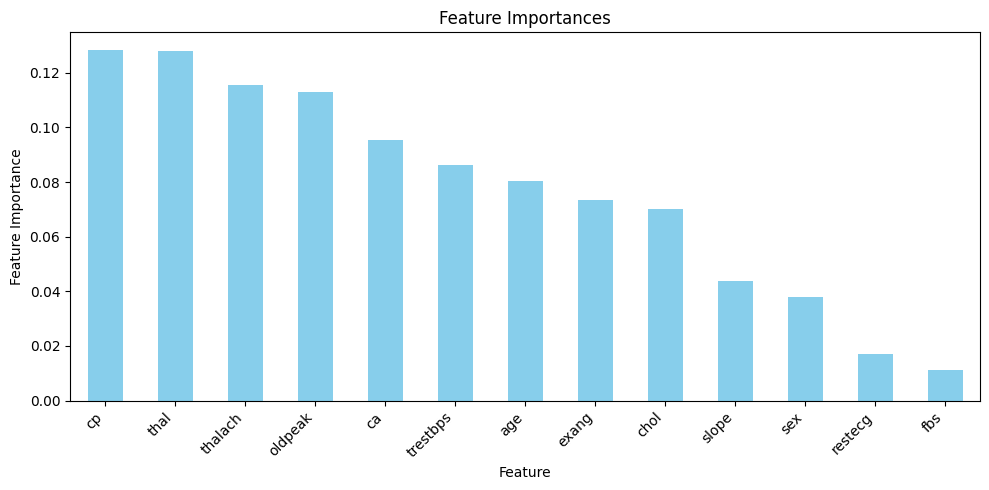

In [53]:
# Making it more visualize

feature_series = pd.Series(future_dict)

# Sort the series by feature importances in descending order
feature_series = feature_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
feature_series.plot(kind='bar', color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### In Random Forest, feature importances represent the relative importance of each feature in the model's decision-making process.
### It measures how much each feature contributes to reducing impurity or increasing information gain in the decision trees of the Random Forest.,

### Now featur importance from different model (just to see difference), logistic classifier

In [54]:
log_h = rs_log.best_estimator_
log_h

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [55]:
log_h.coef_ 

array([[ 0.01621138, -0.57955571,  0.56307464, -0.02048014, -0.00104025,
        -0.05069714,  0.11413944,  0.02783642, -0.47902124, -0.4767727 ,
         0.24188086, -0.50691512, -0.57939696]])

In [56]:
future_dict = dict(zip(X.columns, log_h.coef_[0] ))
future_dict

feature_series = pd.Series(future_dict)
feature_series

age         0.016211
sex        -0.579556
cp          0.563075
trestbps   -0.020480
chol       -0.001040
fbs        -0.050697
restecg     0.114139
thalach     0.027836
exang      -0.479021
oldpeak    -0.476773
slope       0.241881
ca         -0.506915
thal       -0.579397
dtype: float64

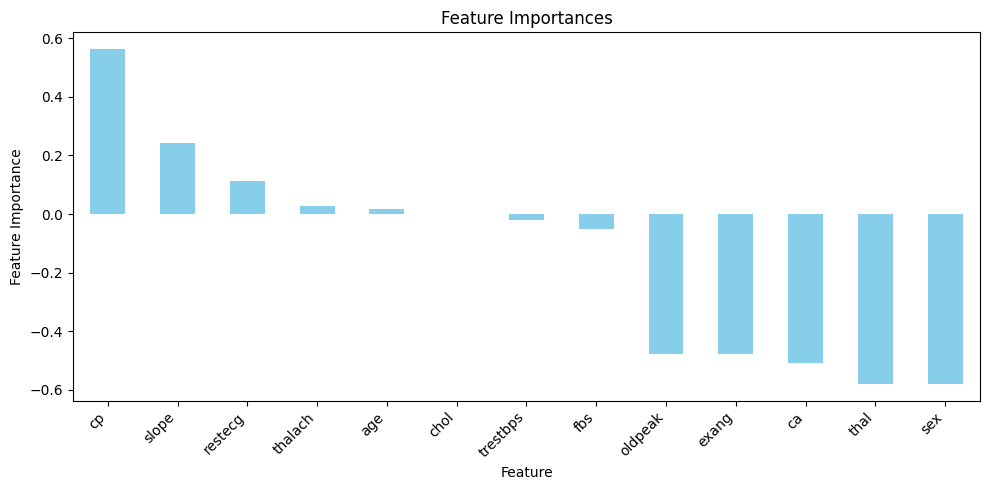

In [57]:

# Sort the series by feature importances in descending order
feature_series = feature_series.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
feature_series.plot(kind='bar', color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Logistic Regression Coefficients:

* In logistic regression, the coefficients represent the change in the log-odds of the target variable (probability of the positive class) for a one-unit change in the corresponding feature, holding all other features constant.
* Positive coefficients indicate that an increase in the feature value is associated with an increase in the log-odds of the target variable, and vice versa for negative coefficients.
* Larger absolute coefficient values indicate a stronger influence of the corresponding feature on the target variable.

# And here be done it!